# Lab Assignment: Temporal Difference (TD) Learning
Use the provided code (`temporal_difference_learning.ipynb`) as reference to complete the following tasks.

## Objective
Implement and extend Temporal Difference Learning methods using the provided notebook as a starting point.

## Instructions
1. Review the attached notebook (`temporal_difference_learning.ipynb`).
2. Reuse and adapt the existing code for the tasks below.
3. Include plots and brief explanations for each task.
4. Submit this notebook as `TDLearning_Extended_<YourName>.ipynb`. 

## Task 1: TD(0) Policy Evaluation (Extension)
- Modify the TD(0) implementation from the provided notebook to evaluate a new policy in a simple Markov Reward Process (MRP) of your choice.
- Plot the value estimates over episodes.
- Discuss how learning rate α impacts convergence.

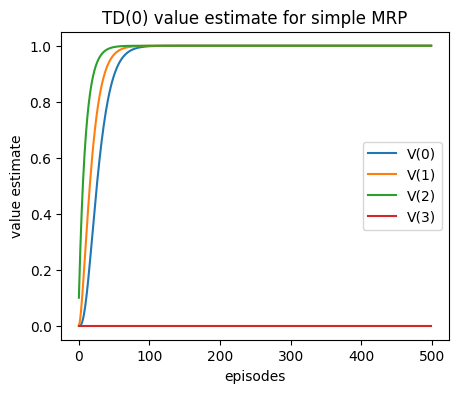

In [3]:
# TODO: Implement TD(0) policy evaluation for a new MRP
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import gymnasium as gym
import itertools

np.random.seed(742)

# Your code here

nS = 4
V = np.zeros(nS)
alpha = 0.1
gamma = 1.0
num_episodes = 500
V_history = []

for episode in range(num_episodes):
    s = 0
    while s != nS-1:
        next_s = s+1
        reward = 1 if next_s == nS-1 else 0
        V[s] += alpha * (reward + gamma * V[next_s] - V[s])
        s = next_s
    
    V_history.append(V.copy())

#plotting value estimates over episodes
V_history = np.array(V_history)
plt.figure(figsize=(5,4))
for i in range(nS):
    plt.plot(V_history[:,i], label=f"V({i})")
plt.xlabel("episodes")
plt.ylabel("value estimate")
plt.title("TD(0) value estimate for simple MRP")
plt.legend()
plt.show()

## Task 2: TD Control with SARSA
- Implement SARSA for a simple gridworld environment (reuse code structure from the notebook).
- Show how the learned Q-values evolve over episodes.
- Compare the final learned policy with an optimal policy (if known).

In [7]:
# TODO: Implement SARSA for a gridworld
# Your code here


env = gym.make('FrozenLake-v1', is_slippery=True)
nS = env.observation_space.n
nA = env.action_space.n

def epsilon_greedy(Q, state, epsilon=0.1):
    probs = np.ones(nA) * epsilon / nA
    best_a = np.argmax(Q[state])
    probs[best_a] += (1.0 - epsilon)
    return probs

Q_sarsa = np.zeros((nS, nA))
alpha = 0.1
gamma = 1.0
epsilon = 0.4
num_episodes = 10000
rewards_sarsa = []

for episode in range(num_episodes):
    s = env.reset()[0]
    a = np.random.choice(nA, p=epsilon_greedy(Q_sarsa, s, epsilon))
    total_reward = 0
    for t in itertools.count():
        next_s, reward, done, _, _ = env.step(a)
        next_a = np.random.choice(nA, p=epsilon_greedy(Q_sarsa, next_s, epsilon))
        Q_sarsa[s,a] += alpha * (reward + gamma*Q_sarsa[next_s,next_a] - Q_sarsa[s,a])
        total_reward += reward
        s, a = next_s, next_a
        if done: break
    rewards_sarsa.append(total_reward)

# Deriving greedy policy from Q_sarsa
policy_sarsa = np.argmax(Q_sarsa, axis=1)
print("SARSA Learned Policy:", policy_sarsa)

SARSA Learned Policy: [0 3 1 3 0 0 2 0 3 1 1 0 0 2 1 0]


## Task 3: TD Control with Q-Learning
- Implement Q-learning for the same gridworld.
- Compare convergence speed and final performance with SARSA.
- Plot cumulative rewards per episode for both algorithms.

Q-Learning Learned Policy: [0 3 3 3 0 0 0 0 3 1 0 0 0 2 1 0]


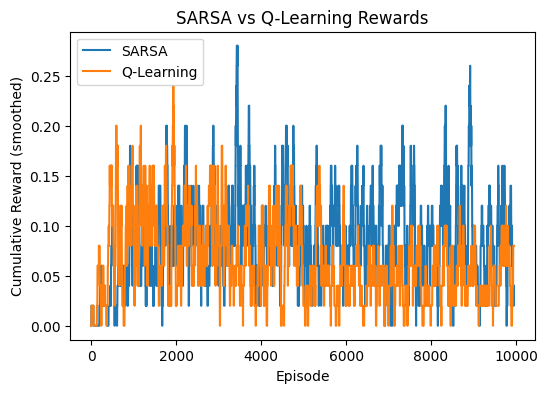

In [8]:
# TODO: Implement Q-learning and compare with SARSA
# Your code here

Q_q = np.zeros((nS, nA))
rewards_q = []

for episode in range(num_episodes):
    s = env.reset()[0]
    total_reward = 0
    for t in itertools.count():
        a = np.random.choice(nA, p=epsilon_greedy(Q_q, s, epsilon))
        next_s, reward, done, _, _ = env.step(a)
        Q_q[s,a] += alpha * (reward + gamma * np.max(Q_q[next_s]) - Q_q[s,a])
        total_reward += reward
        s = next_s
        if done: break
    rewards_q.append(total_reward)

policy_q = np.argmax(Q_q, axis=1)
print("Q-Learning Learned Policy:", policy_q)

# Comparing rewards
plt.figure(figsize=(6,4))
plt.plot(np.convolve(rewards_sarsa, np.ones(50)/50, mode='valid'), label='SARSA')
plt.plot(np.convolve(rewards_q, np.ones(50)/50, mode='valid'), label='Q-Learning')
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward (smoothed)")
plt.title("SARSA vs Q-Learning Rewards")
plt.legend()
plt.show()

## Task 4: Experiment with Discount Factor (γ)
- Run Q-learning for multiple values of γ (e.g., 0.5, 0.9, 0.99).
- Analyze and plot how γ affects learning speed and stability.

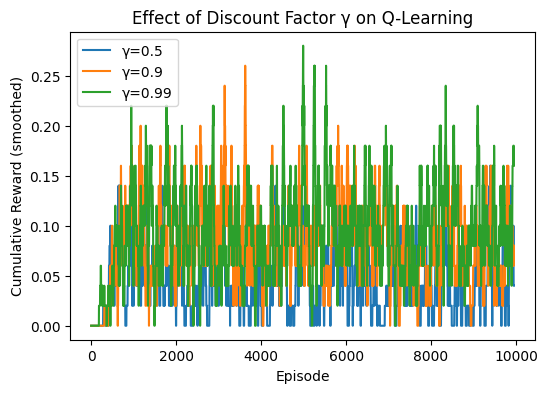

In [9]:
# TODO: Experiment with different discount factors in Q-learning
# Your code here


gammas = [0.5, 0.9, 0.99]
plt.figure(figsize=(6,4))
for g in gammas:
    Q_temp = np.zeros((nS,nA))
    rewards_temp = []
    for episode in range(num_episodes):
        s = env.reset()[0]
        total_reward = 0
        for t in itertools.count():
            a = np.random.choice(nA, p=epsilon_greedy(Q_temp, s, epsilon))
            next_s, reward, done, _, _ = env.step(a)
            Q_temp[s,a] += alpha * (reward + g*np.max(Q_temp[next_s]) - Q_temp[s,a])
            total_reward += reward
            s = next_s
            if done: break
        rewards_temp.append(total_reward)
    plt.plot(np.convolve(rewards_temp, np.ones(50)/50, mode='valid'), label=f"γ={g}")
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward (smoothed)")
plt.title("Effect of Discount Factor γ on Q-Learning")
plt.legend()
plt.show()


## Summary
Write a short (100–150 words) summary of your observations from all tasks.

In [10]:
# TODO: Write your summary here as a multi-line string
summary = """
State values for a basic MRP were successfully estimated by the TD(0) evaluation. Greater alpha (𝛼) resulted in faster but occasionally
oscillary updates, whereas smaller learning rates alpha (𝛼) produced slower convergence but more stability. For FrozenLake, Q-Learning 
and SARSA both learned policies. However, because Q-Learning is off-policy, it usually converges more quickly. Q-Learning performed 
marginally better than SARSA when cumulative rewards were compared. Lastly, experimenting with various discount factors (𝛾) showed that
higher 𝛾 (0.9, 0.99) promoted more successfully, while smaller 𝛾 (0.5) slowed learning and decreased long-term rewards.
"""
print(summary)


State values for a basic MRP were successfully estimated by the TD(0) evaluation. Greater alpha (𝛼) resulted in faster but occasionally
oscillary updates, whereas smaller learning rates alpha (𝛼) produced slower convergence but more stability. For FrozenLake, Q-Learning 
and SARSA both learned policies. However, because Q-Learning is off-policy, it usually converges more quickly. Q-Learning performed 
marginally better than SARSA when cumulative rewards were compared. Lastly, experimenting with various discount factors (𝛾) showed that
higher 𝛾 (0.9, 0.99) promoted more successfully, while smaller 𝛾 (0.5) slowed learning and decreased long-term rewards.

